# Mapa de Oferta Alimentaria Saludable en Lima, Peru

In [1]:
# Dependencias
import pandas as pd
import numpy as np
import geopandas as gpd
import urbanpy as up
import contextily as cx
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib.lines import Line2D

## Bioferias

### Ferias organizadas por promotores que controlan una oferta realmente ecológica:

- Feria Ecológica de Barranco (Calle San Martín cuadra 7, Barranco / domingos), -12.138176, -77.0229817
- Ecoferia de Cieneguilla (Frente parque Simón Bolívar; III etapa Cieneguilla / domingos), -12.0943875, -76.7749452
- BioFeria de Miraflores (parque Reducto / sábados), -12.1270848, -77.022242
- BioFeria de Surquillo (jirón Narciso de la Colina 580 / domingos), -12.118381, -77.025619

### Feria que escoge una oferta saludable combinando entre ecológicos certificados y convencionales - AgroFerias Campesinas:

- sede Puericultorio Pérez Araníbar (jirón Antonio Raymondi 141, Magdalena del Mar / viernes, sábados, domingos), -12.0990915, -77.06884
- sede San Isidro (avenida Aramburú cruce con calle 3, San Isidro / sábados), -12.1021172, -77.0162924
- sede Parque de la Familia, San Borja (Av. San Borja Sur con jirón Frederic Remington / domingos), -12.098735230950824, -77.01049887420028

### Bioferias de vecindarios alimentarios:

- BioFeria Casablanca, Pachacamac  (2do sabado / mensual)
- BioFeria Tungasuca, Carabayllo (sabado / semanal)

In [2]:
bioferias = [
    {'nombre': 'Feria Ecológica de Barranco', 
     'direccion': 'Calle San Martín cuadra 7, Barranco',
     'temporalidad': 'domingos',
     'observaciones': 'Ferias organizadas por promotores que controlan una oferta realmente ecológica',
     'lat': -12.138176, 'lon': -77.0229817},
    {'nombre': 'Ecoferia de Cieneguilla', 
     'direccion': 'Frente parque Simón Bolívar; III etapa Cieneguilla',
     'temporalidad': 'domingos',
     'observaciones': 'Ferias organizadas por promotores que controlan una oferta realmente ecológica',
     'lat': -12.0943875, 'lon': -76.7749452},
    {'nombre': 'BioFeria de Miraflores', 
     'direccion': 'Parque Reducto',
     'temporalidad': 'sábados',
     'observaciones': 'Ferias organizadas por promotores que controlan una oferta realmente ecológica',
     'lat': -12.1270848, 'lon': -77.022242},
    {'nombre': 'BioFeria de Surquillo', 
     'direccion': 'Jirón Narciso de la Colina 580',
     'temporalidad': 'domingos',
     'observaciones': 'Ferias organizadas por promotores que controlan una oferta realmente ecológica',
     'lat': -12.118381, 'lon': -77.025619},
    {'nombre': 'AgroFeria Campesina', 
     'direccion': 'Jirón Antonio Raymondi 141, Magdalena del Mar',
     'temporalidad': 'viernes, sábados y domingos',
     'observaciones': 'Feria que escoge una oferta saludable combinando entre ecológicos certificados y convencionales',
     'lat': -12.0990915, 'lon': -77.06884},
    {'nombre': 'AgroFeria Campesina',  
     'direccion': 'Avenida Aramburú cruce con calle 3, San Isidro',
     'temporalidad': 'sábados',
     'observaciones': 'Feria que escoge una oferta saludable combinando entre ecológicos certificados y convencionales',
     'lat': -12.1021172, 'lon': -77.0162924},
    {'nombre': 'AgroFeria Campesina',  
     'direccion': 'Avenida San Borja Sur con Jirón Frederic Remington',
     'temporalidad': 'domingos',
     'observaciones': 'Feria que escoge una oferta saludable combinando entre ecológicos certificados y convencionales',
     'lat': -12.098735230950824, 'lon': -77.01049887420028},
    {'nombre': 'BioFeria Casablanca', 'lat': -12.205550, 'lon': -76.866392},
    {'nombre': 'BioFeria Tungasuca', 'lat': -11.89664, 'lon': -77.04062},
]

In [3]:
bioferias_pd = pd.DataFrame.from_records(bioferias)
bioferias_geo = gpd.points_from_xy(bioferias_pd['lon'], bioferias_pd['lat'])
bioferias_gpd = gpd.GeoDataFrame(bioferias_pd, crs='EPSG:4326', geometry=bioferias_geo)
bioferias_gpd

,nombre,direccion,temporalidad,observaciones,lat,lon,geometry
0,Feria Ecológica de Barranco,"Calle San Martín cuadra 7, Barranco",domingos,Ferias organizadas por promotores que controla...,-12.138176,-77.022982,POINT (-77.02298 -12.13818)
1,Ecoferia de Cieneguilla,Frente parque Simón Bolívar; III etapa Cienegu...,domingos,Ferias organizadas por promotores que controla...,-12.094387,-76.774945,POINT (-76.77495 -12.09439)
2,BioFeria de Miraflores,Parque Reducto,sábados,Ferias organizadas por promotores que controla...,-12.127085,-77.022242,POINT (-77.02224 -12.12708)
3,BioFeria de Surquillo,Jirón Narciso de la Colina 580,domingos,Ferias organizadas por promotores que controla...,-12.118381,-77.025619,POINT (-77.02562 -12.11838)
4,AgroFeria Campesina,"Jirón Antonio Raymondi 141, Magdalena del Mar","viernes, sábados y domingos",Feria que escoge una oferta saludable combinan...,-12.099092,-77.068840,POINT (-77.06884 -12.09909)
5,AgroFeria Campesina,"Avenida Aramburú cruce con calle 3, San Isidro",sábados,Feria que escoge una oferta saludable combinan...,-12.102117,-77.016292,POINT (-77.01629 -12.10212)
6,AgroFeria Campesina,Avenida San Borja Sur con Jirón Frederic Remin...,domingos,Feria que escoge una oferta saludable combinan...,-12.098735,-77.010499,POINT (-77.01050 -12.09874)
7,BioFeria Casablanca,NaN,NaN,NaN,-12.205550,-76.866392,POINT (-76.86639 -12.20555)
8,BioFeria Tungasuca,NaN,NaN,NaN,-11.896640,-77.040620,POINT (-77.04062 -11.89664)


## Ferias itinerantes de la MML

Organizadas por: Subgerencia de Desarrollo Productivo / Gerencia de Desarrollo Economico

In [4]:
ferias_sdp = pd.read_excel("/home/claudio/Downloads/FERIAS SDP - ESPACIOS - 2022.xlsx", header=5, index_col=0, usecols="B:I")

In [5]:
ferias_sdp.head()

,Actividad,Fecha,Lugar,Referencia,Google maps url,latitude,longitude
N°,,,,,,,
1,Feria Renacer Alimentario Nº1,2022-01-22 00:00:00,Colegio Ludwing van Beethoven,Cruce de la Av. Aurelio García y García con la...,https://www.google.com/maps/place/Colegio+Ludw...,-12.050837,-77.059565
2,Feria Renacer Alimentario Nº2,2022-01-29 00:00:00,Losa deportiva Unidad Vecinal 3,Altura de la Cdra. 31 de la Av. Colonial - Cer...,https://www.google.com/maps/place/Losa+UV3/@-1...,-12.052171,-77.081767
3,Feria Renacer Alimentario Nº3,2022-02-05 00:00:00,Losa deportiva Roma,"Altura de la Cdra 25 de la Av. Colonial, Cerca...",https://www.google.com/maps/place/Av.+%C3%93sc...,-12.047439,-77.053901
4,Feria Renacer Alimentario Nº4,2022-02-19 00:00:00,Parque 9 de diciembre,"Cruce del Jirón Juan Crespo y la Cl. Mercedes,...",https://www.google.com/maps/place/9+de+Diciemb...,-12.036312,-77.074901
5,Feria Renacer Alimentario Nº5,2022-03-05 00:00:00,Parque Santa Rosa,Altura de la Cdra. 11 de la Av. Belisario Sosa...,https://www.google.com/maps/place/Parque+Santa...,-12.060091,-77.065285


### Fix dates

In [6]:
no_datetime_filter = ferias_sdp["Fecha"].apply(type) == str
ferias_sdp_no_dt = ferias_sdp["Fecha"][no_datetime_filter]
ferias_sdp_dt = ferias_sdp["Fecha"][~no_datetime_filter]

In [7]:
ferias_sdp_no_dt

N°
9         04/05/22 al 07/05/22
11    21/05/2022 al 22/05/2022
13            10,11,12/06/2022
20    31/08/2022 al 04/09/2022
23     29/09/2022 al 1/10/2022
24            13 al 16/10/2022
Name: Fecha, dtype: object

In [8]:
# Handle special cases
special_case_1 = ferias_sdp_no_dt.loc[13] # 10,11,12/06/2022
special_case_2 = ferias_sdp_no_dt.loc[24] # 13 al 16/10/2022

special_case_start = pd.Series([("10/06/2022"), ("13/10/2022")], index=[13, 24])
special_case_end = pd.Series([("12/06/2022"), ("16/10/2022")], index=[13, 24])

ferias_sdp_no_dt = ferias_sdp_no_dt.drop([13, 24])

In [9]:
# Separate start and end dates in to cols
start_dt = ferias_sdp_no_dt.str.split(" al ", expand=True)[0]
end_dt = ferias_sdp_no_dt.str.split(" al ", expand=True)[1]

In [10]:
# Fix date format
start_dt.loc[9] = start_dt.loc[9].replace("22", "2022")
end_dt.loc[9] = end_dt.loc[9].replace("22", "2022")
end_dt.loc[23] = end_dt.loc[23].replace("1/", "01/")

In [11]:
# Convert all datetimes
start_dt = pd.to_datetime(start_dt, format="%d/%m/%Y")
end_dt = pd.to_datetime(end_dt, format="%d/%m/%Y")
special_case_start = pd.to_datetime(special_case_start, format="%d/%m/%Y")
special_case_end = pd.to_datetime(special_case_end, format="%d/%m/%Y")
ferias_sdp_dt = pd.to_datetime(ferias_sdp_dt)

In [12]:
# Concatenate all sets
start_dates_column = pd.concat((ferias_sdp_dt, start_dt, special_case_start)).sort_index()
end_dates_column = pd.concat((ferias_sdp_dt, end_dt, special_case_end)).sort_index()
dates_columns = pd.concat((start_dates_column, end_dates_column), axis=1)
dates_columns.columns = ["inicio", "fin"]

In [13]:
# Merge with original df
ferias_sdp_dates_clean = ferias_sdp.merge(dates_columns, left_index=True, right_index=True)

### Process coordinates

In [14]:
ferias_sdp_gdf = gpd.GeoDataFrame(ferias_sdp_dates_clean, crs="EPSG:4326",
                                  geometry=gpd.points_from_xy(ferias_sdp_dates_clean['longitude'],
                                                              ferias_sdp_dates_clean['latitude']))

In [15]:
ferias_sdp_gdf.geometry.explore()

## Biotiendas:

### Flora y Fauna
- Flora y Fauna Miraflores, Avenida Mariscal La Mar 1110, -12.1108903, -77.0478323
- Flora y Fauna San Borja, Av. Aviación 3110, -12.1013079!4d-77.001902
- Flora y Fauna Surco, Av. Primavera 654, -12.1111641!4d-76.9865775
- Flora y Fauna La Molina, Av. Raúl Ferrero 1415, Lima 15024, Perú, -12.0915649!4d-76.9522467
- Flora y Fauna Miraflores 2*, Av. Alfredo Benavides 2150, Miraflores 15048, Perú, -12.1276912!4d-77.0101165

### Vacas Felices
- Vacas Felices, Calle Alarifes Urb. Matellini MZ E-4 LT 63, Chorrillos, -12.1695999!4d-77.0076161
- Vacas Felices, JR. Los Lureles 106, Valle Hermoso, Surco, -12.126431!4d-76.9758164
- Vacas Felices, Juan Norberto Elespuru 305, San Isidro, -12.0965521!4d-77.0527479
- Vacas Felices, Barranco, Jr. Colina 108 (Alt. cuadra 5 de Av. Grau, espalda de la comisaria de Barranco, -12.1458844!4d-77.0222768
- Vacas Felices, San Isidro, Calle Alberto Arca Parró 194 -12.106375!4d-77.0364131

> \*No figura en la pagina web pero si en google maps.

In [16]:
biotiendas = [
    ['Flora y Fauna', 'Avenida Mariscal La Mar 1110, Miraflores', -12.1108903, -77.0478323],
    ['Flora y Fauna', 'Avenida Aviación 3110, San Borja', -12.1013079, -77.001902],
    ['Flora y Fauna', 'Avenida Primavera 654, Surco', -12.1111641, -76.9865775],
    ['Flora y Fauna', 'Avenida Raúl Ferrero 1415, La Molina', -12.0915649, -76.9522467],
    ['Flora y Fauna', 'Avenida Alfredo Benavides 2150, Miraflores', -12.1276912, -77.0101165],
    ['Vacas Felices', 'Calle Alarifes Urb. Matellini MZ E-4 LT 63, Chorrillos', -12.1695999, -77.0076161],
    ['Vacas Felices', 'Jiron Los Lureles 106, Valle Hermoso, Surco', -12.126431, -76.9758164],
    ['Vacas Felices', 'Juan Norberto Elespuru 305, San Isidro', -12.0965521, -77.0527479],
    ['Vacas Felices', 'Jiron Colina 108, Barranco', -12.1458844, -77.0222768],
    ['Vacas Felices', 'Calle Alberto Arca Parró 194, San Isidro', -12.106375, -77.0364131],
]

In [17]:
biotiendas_pd = pd.DataFrame(biotiendas, columns=['nombre', 'direccion', 'lat', 'lon'])
biotiendas_geo = gpd.points_from_xy(biotiendas_pd['lon'], biotiendas_pd['lat'])
biotiendas_gpd = gpd.GeoDataFrame(biotiendas_pd, crs='EPSG:4326', geometry=biotiendas_geo)
biotiendas_gpd

,nombre,direccion,lat,lon,geometry
0,Flora y Fauna,"Avenida Mariscal La Mar 1110, Miraflores",-12.110890,-77.047832,POINT (-77.04783 -12.11089)
1,Flora y Fauna,"Avenida Aviación 3110, San Borja",-12.101308,-77.001902,POINT (-77.00190 -12.10131)
2,Flora y Fauna,"Avenida Primavera 654, Surco",-12.111164,-76.986577,POINT (-76.98658 -12.11116)
3,Flora y Fauna,"Avenida Raúl Ferrero 1415, La Molina",-12.091565,-76.952247,POINT (-76.95225 -12.09156)
4,Flora y Fauna,"Avenida Alfredo Benavides 2150, Miraflores",-12.127691,-77.010116,POINT (-77.01012 -12.12769)
5,Vacas Felices,"Calle Alarifes Urb. Matellini MZ E-4 LT 63, Ch...",-12.169600,-77.007616,POINT (-77.00762 -12.16960)
6,Vacas Felices,"Jiron Los Lureles 106, Valle Hermoso, Surco",-12.126431,-76.975816,POINT (-76.97582 -12.12643)
7,Vacas Felices,"Juan Norberto Elespuru 305, San Isidro",-12.096552,-77.052748,POINT (-77.05275 -12.09655)
8,Vacas Felices,"Jiron Colina 108, Barranco",-12.145884,-77.022277,POINT (-77.02228 -12.14588)
9,Vacas Felices,"Calle Alberto Arca Parró 194, San Isidro",-12.106375,-77.036413,POINT (-77.03641 -12.10637)


## Supermercados con organicos

Aun falta determinar cuales son. Por el momento descargaremos todos los Wong y Tottus que se encuentren en OpenStreetMap (OSM)

In [18]:
lima_met = up.download.nominatim_osm('Lima Metropolitana, Peru')

In [19]:
lima_met = lima_met.set_crs('EPSG:4326')

In [20]:
lima_met.total_bounds

array([-77.1992129, -12.5199316, -76.6208244, -11.5724356])

In [21]:
overpass_query = '''
[timeout:120][out:json][bbox];
( 
  node[shop=supermarket][name~"Wong|Tottus",i];
);
out body geom;
'''

res = up.download.overpass_pois(bounds=lima_met.total_bounds, custom_query=overpass_query)

In [22]:
res.raise_for_status()

In [23]:
data = res.json()

In [24]:
osm_elements = pd.DataFrame.from_dict(data['elements']).drop('tags', axis=1)

In [25]:
geometry = gpd.points_from_xy(osm_elements['lon'], osm_elements['lat'], crs='EPSG:4326')

In [26]:
osm_tags = pd.DataFrame([e['tags'] for e in data['elements']])

In [27]:
supermarkets_gpd = gpd.GeoDataFrame(pd.concat((osm_elements, osm_tags), axis=1), 
                                    geometry=geometry)

In [28]:
supermarkets_gpd.shape

(20, 31)

In [29]:
supermarkets_gpd.head()

,type,id,lat,lon,addr:city,addr:housenumber,addr:street,name,operator,shop,...,branch,opening_hours,phone,addr:postcode,addr:district,addr:neighbourhood,source,name:en,ele,geometry
0,node,1426626482,-12.089883,-77.005579,San Borja,162,Jirón Ucello,Wong,Wong Ucello,supermarket,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-77.00558 -12.08988)
1,node,1800680808,-12.147579,-76.980746,NaN,1803,Avenida Circunvalación,Tottus Atocongo,Tottus,supermarket,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-76.98075 -12.14758)
2,node,1846396610,-12.056394,-77.101389,Bellavista,3866,Avenida Óscar Raimundo Benavides,Tottus,Tottus,supermarket,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-77.10139 -12.05639)
3,node,1917986232,-11.993996,-77.061965,Independencia,3698,Alfredo Mendiola,Tottus,Tottus Megaplaza,supermarket,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-77.06196 -11.99400)
4,node,2099768082,-12.091850,-76.950868,NaN,NaN,NaN,Wong,NaN,supermarket,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-76.95087 -12.09185)


In [30]:
supermarkets_gpd['name_clean'] = supermarkets_gpd['name'].apply(
    lambda x: 'Wong' if 'Wong' in x else 'Tottus')

### Distritos

In [31]:
districts = gpd.read_file('https://storage.googleapis.com/up_public_geodata/admin_bounds/peru/districts.zip', mask=lima_met)

In [32]:
all_points = pd.concat([bioferias_gpd[['geometry']], biotiendas_gpd[['geometry']], ferias_sdp_gdf[['geometry']]])

In [33]:
districts_with_points = districts.sjoin(all_points).drop_duplicates(subset='IDDIST')

### Vecindarios

In [34]:
zona_carabayllo = gpd.read_file('inputs/zona_carabayllo.geojson', crs=4326)
zona_pachacamac = gpd.read_file('inputs/zona_pachacamac.geojson', crs=4326)

In [35]:
from shapely.validation import make_valid

In [36]:
zona_carabayllo.geometry = zona_carabayllo.geometry.apply(make_valid)
zona_pachacamac.geometry = zona_pachacamac.geometry.apply(make_valid)

In [37]:
zona_carabayllo = gpd.GeoSeries(zona_carabayllo.geometry.unary_union.buffer(0.0001).exterior, crs=4326)
zona_pachacamac = gpd.GeoSeries(zona_pachacamac.geometry.unary_union.buffer(0.0001).exterior, crs=4326)

## Lima hexs

In [38]:
lima_hexs = gpd.read_file("outputs/lima_hexs9_distance_to_bio.geojson")

In [39]:
lima_hexs.shape

(22991, 40)

In [40]:
lima_hexs.columns

Index(['hex', 'population_2020', 'population_2015', 'population_youth',
       'population_children', 'population_elderly', 'BFA', 'Manufacturing',
       'Other', 'Retail', 'Services', 'Alto', 'Bajo', 'Medio', 'Medio Alto',
       'Medio Bajo', 'missing', 'lat', 'lon', 'nearest_food_facility_ix',
       'distance_to_food_facility', 'duration_to_food_facility',
       'duration_to_food_facility_bins', 'nearest_health_facility_ix',
       'distance_to_health_facility', 'duration_to_health_facility',
       'duration_to_health_facility_bins', 'Ai', 'nj', 'ds', 'INGR_PER',
       'INGR_HOG_PROM', 'vulnerabilidad_monetaria', 'vulnerabilidad_laboral',
       'vulnerabilidad_hidrica', 'nearest_poi_ix', 'distance_to_nearest_poi',
       'duration_to_nearest_poi', 'duration_to_nearest_poi_label', 'geometry'],
      dtype='object')

## Generate maps

In [41]:
UTM_CRS = 'EPSG:32718'
lima_met_proj = lima_met.to_crs(UTM_CRS)
bioferias_gpd_proj = bioferias_gpd.to_crs(UTM_CRS)
biotiendas_gpd_proj = biotiendas_gpd.to_crs(UTM_CRS)
supermarkets_gpd_proj = supermarkets_gpd.to_crs(UTM_CRS)
ferias_sdp_gdf_proj = ferias_sdp_gdf.to_crs(UTM_CRS)
districts_with_points_proj = districts_with_points.to_crs(UTM_CRS)
zona_carabayllo_proj = zona_carabayllo.to_crs(UTM_CRS)
zona_pachacamac_proj = zona_pachacamac.to_crs(UTM_CRS)
lima_hexs_proj = lima_hexs.to_crs(UTM_CRS)

In [42]:
# Smooth borders
lima_met_smooth_proj = lima_met_proj.buffer(0.0001)

In [43]:
districts_w_points_centroid = districts_with_points_proj.centroid

### Mapa de oferta alimentaria

Capas:  
- Puntos
- Limites distritales
- Vecindarios

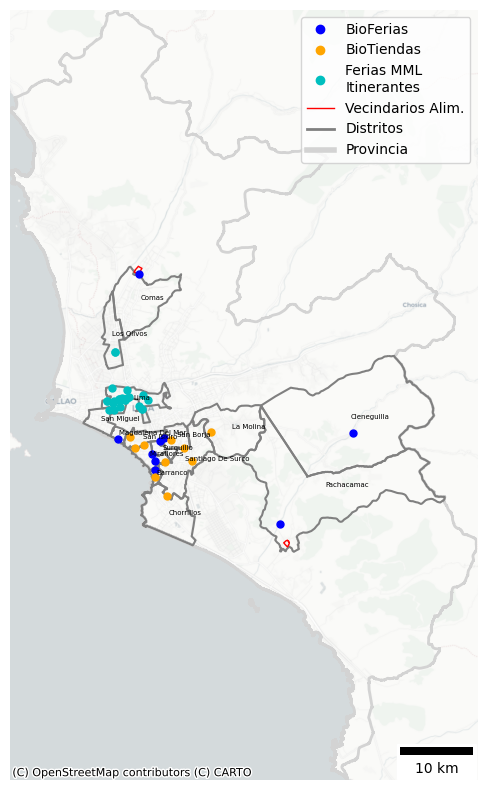

In [44]:
ax = lima_met_smooth_proj.plot(facecolor='none', edgecolor='lightgrey', linewidth=2, figsize=(10,10))
districts_with_points_proj.plot(facecolor='none', edgecolor='grey', linewidth=1.5, ax=ax)

texts = []
for x, y, label in zip(districts_w_points_centroid.geometry.x, districts_w_points_centroid.geometry.y, districts_with_points["DISTRITO"].str.title()):
    texts.append(plt.text(x, y, label, fontsize=5))

zona_carabayllo_proj.plot(facecolor='none', edgecolor='red', linewidth=1, zorder=1, ax=ax)
zona_pachacamac_proj.plot(facecolor='none', edgecolor='red', linewidth=1, zorder=1, ax=ax)    

bioferias_gpd_proj.plot(ax=ax, color='b', markersize=25)
biotiendas_gpd_proj.plot(ax=ax, color='orange', markersize=25)
ferias_sdp_gdf_proj.plot(ax=ax, color='c', markersize=25)

minx, miny, maxx, maxy = lima_met_smooth_proj.total_bounds
margins = 100
ax.set_xlim(minx-margins, maxx+margins)
ax.set_ylim(miny-margins, maxy+margins)

ax.add_artist(ScaleBar(1, location='lower right'))

b_patch = Line2D([0],[0], marker='o', color='b', linewidth=0, label='BioFerias')
orange_patch = Line2D([0],[0], marker='o', color='orange', linewidth=0, label='BioTiendas')
c_patch = Line2D([0],[0], marker='o', color='c', linewidth=0, label='Ferias MML\nItinerantes')

r_line = Line2D([0],[0], color='r', linewidth=1, label='Vecindarios Alim.')
g_line = Line2D([0],[0], color='grey', linewidth=2, label='Distritos')
lg_line = Line2D([0],[0], color='lightgrey', linewidth=4, label='Provincia')

plt.legend(handles=[b_patch, orange_patch, c_patch, r_line, g_line, lg_line])

ax.set_axis_off()
cx.add_basemap(ax=ax, source=cx.providers.CartoDB.Positron, crs=UTM_CRS)

plt.savefig('outputs/producto_2/maps/puntos_distritos_vecindarios.png', dpi=300, bbox_inches='tight')

### Mapa de oferta alimentaria

Capas:  
- Puntos
- Limites distritales
- Vecindarios
- Densidad

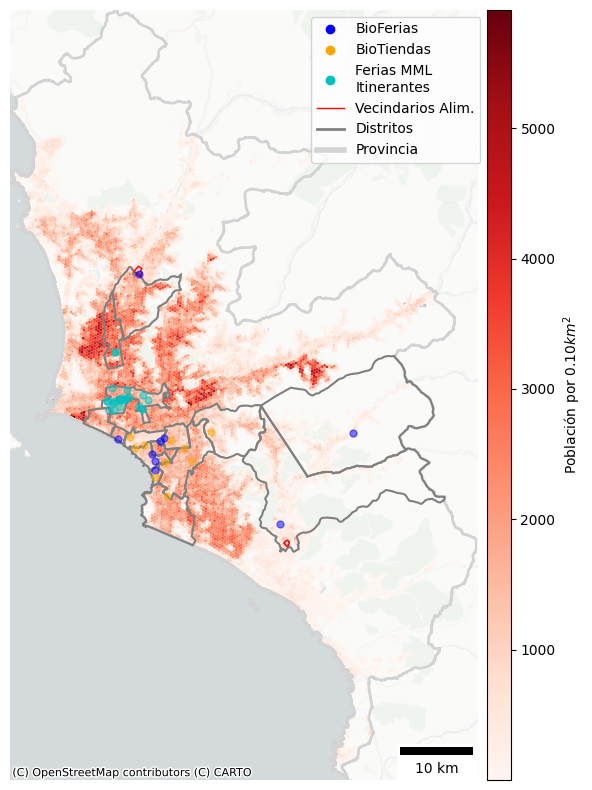

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

divider = make_axes_locatable(ax)

cax = divider.append_axes("right", size="5%", pad=0.1)

leg_kwds = {'label': "Población por 0.10$km^2$"}

ax = lima_hexs_proj.plot('population_2020', cmap="Reds", legend=True, legend_kwds=leg_kwds, cax=cax, ax=ax)


lima_met_smooth_proj.plot(facecolor='none', edgecolor='lightgrey', linewidth=2, ax=ax)
districts_with_points_proj.plot(facecolor='none', edgecolor='grey', linewidth=1.5, ax=ax)

# texts = []
# for x, y, label in zip(districts_w_points_centroid.geometry.x, districts_w_points_centroid.geometry.y, districts_with_points["DISTRITO"].str.title()):
#    texts.append(plt.text(x, y, label, fontsize=5))

zona_carabayllo_proj.plot(facecolor='none', edgecolor='red', linewidth=1, zorder=1, ax=ax)
zona_pachacamac_proj.plot(facecolor='none', edgecolor='red', linewidth=1, zorder=1, ax=ax)    

bioferias_gpd_proj.plot(ax=ax, color='b', markersize=25, alpha=0.5)
biotiendas_gpd_proj.plot(ax=ax, color='orange', markersize=25, alpha=0.5)
ferias_sdp_gdf_proj.plot(ax=ax, color='c', markersize=25, alpha=0.5)

minx, miny, maxx, maxy = lima_met_smooth_proj.total_bounds
margins = 100
ax.set_xlim(minx-margins, maxx+margins)
ax.set_ylim(miny-margins, maxy+margins)

ax.add_artist(ScaleBar(1, location='lower right'))

b_patch = Line2D([0],[0], marker='o', color='b', linewidth=0, label='BioFerias')
orange_patch = Line2D([0],[0], marker='o', color='orange', linewidth=0, label='BioTiendas')
c_patch = Line2D([0],[0], marker='o', color='c', linewidth=0, label='Ferias MML\nItinerantes')

r_line = Line2D([0],[0], color='r', linewidth=1, label='Vecindarios Alim.')
g_line = Line2D([0],[0], color='grey', linewidth=2, label='Distritos')
lg_line = Line2D([0],[0], color='lightgrey', linewidth=4, label='Provincia')

plt.legend(handles=[b_patch, orange_patch, c_patch, r_line, g_line, lg_line], loc='upper right', bbox_to_anchor=(0, 1))

ax.set_axis_off()
cx.add_basemap(ax=ax, source=cx.providers.CartoDB.Positron, crs=UTM_CRS)

plt.savefig('outputs/producto_2/maps/puntos_distritos_vecindarios_poblacion.png', dpi=300, bbox_inches='tight')

### Mapa de oferta alimentaria

Capas:  
- Puntos
- Limites distritales
- Vecindarios
- Pobreza

In [46]:
lima_hexs_proj['NSE'] = lima_hexs_proj[['Alto', 'Bajo', 'Medio', 'Medio Alto', 'Medio Bajo']].idxmax(axis=1)

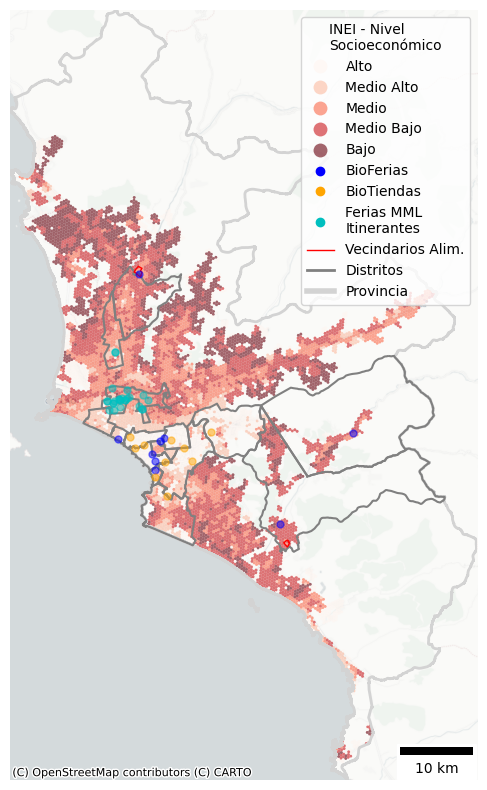

In [60]:
cat_order = ['Alto', 'Medio Alto', 'Medio', 'Medio Bajo', 'Bajo']
ax = lima_hexs_proj.plot('NSE', cmap="Reds", legend=True, categories=cat_order, alpha=0.6, figsize=(10,10))

lima_met_smooth_proj.plot(facecolor='none', edgecolor='lightgrey', linewidth=2, ax=ax)
districts_with_points_proj.plot(facecolor='none', edgecolor='grey', linewidth=1.5, ax=ax)

# texts = []
# for x, y, label in zip(districts_w_points_centroid.geometry.x, districts_w_points_centroid.geometry.y, districts_with_points["DISTRITO"].str.title()):
#    texts.append(plt.text(x, y, label, fontsize=5))

zona_carabayllo_proj.plot(facecolor='none', edgecolor='red', linewidth=1, zorder=1, ax=ax)
zona_pachacamac_proj.plot(facecolor='none', edgecolor='red', linewidth=1, zorder=1, ax=ax)    

bioferias_gpd_proj.plot(ax=ax, color='b', markersize=25, alpha=0.5)
biotiendas_gpd_proj.plot(ax=ax, color='orange', markersize=25, alpha=0.5)
ferias_sdp_gdf_proj.plot(ax=ax, color='c', markersize=25, alpha=0.5)

minx, miny, maxx, maxy = lima_met_smooth_proj.total_bounds
margins = 100
ax.set_xlim(minx-margins, maxx+margins)
ax.set_ylim(miny-margins, maxy+margins)

ax.add_artist(ScaleBar(1, location='lower right'))

b_patch = Line2D([0],[0], marker='o', color='b', linewidth=0, label='BioFerias')
orange_patch = Line2D([0],[0], marker='o', color='orange', linewidth=0, label='BioTiendas')
c_patch = Line2D([0],[0], marker='o', color='c', linewidth=0, label='Ferias MML\nItinerantes')

r_line = Line2D([0],[0], color='r', linewidth=1, label='Vecindarios Alim.')
g_line = Line2D([0],[0], color='grey', linewidth=2, label='Distritos')
lg_line = Line2D([0],[0], color='lightgrey', linewidth=4, label='Provincia')

new_handlers = [b_patch, orange_patch, c_patch, r_line, g_line, lg_line]
new_labels = [p.get_label() for p in new_handlers]

leg = ax.get_legend()
handlers = leg.legendHandles
labels = [text.get_text() for text in leg.texts]

ax.legend(handlers+new_handlers, labels+new_labels, title='INEI - Nivel\nSocioeconómico')

ax.set_axis_off()
cx.add_basemap(ax=ax, source=cx.providers.CartoDB.Positron, crs=UTM_CRS)

plt.savefig('outputs/producto_2/maps/puntos_distritos_vecindarios_nse.png', dpi=300, bbox_inches='tight')

### Mapa de oferta alimentaria

Capas:  
- Puntos
- Limites distritales
- Vecindarios
- Accessibilidad

In [48]:
lima_hexs_proj['duration_to_nearest_poi_label'].unique()

array(['Más de 120', 'De 60 a 90', 'De 30 a 45', 'De 90 a 120',
       'De 15 a 30', 'De 0 a 15', 'De 45 a 60', 'nan'], dtype=object)

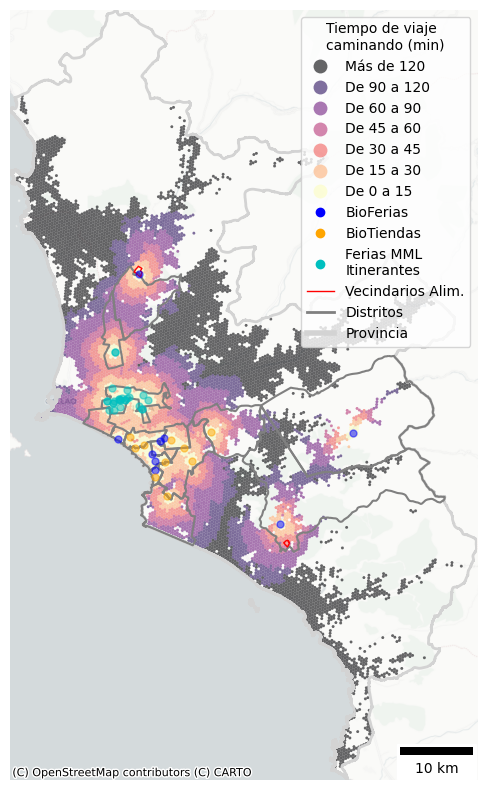

In [57]:
cat_order = ['Más de 120', 'De 90 a 120', 'De 60 a 90', 'De 45 a 60', 'De 30 a 45', 'De 15 a 30', 'De 0 a 15']

dff = (lima_hexs_proj.query('population_2020 > 0')
                     .query("duration_to_nearest_poi_label != 'nan'"))
ax = dff.plot('duration_to_nearest_poi_label', cmap="magma", legend=True, categories=cat_order, alpha=0.6, figsize=(10,10))

lima_met_smooth_proj.plot(facecolor='none', edgecolor='lightgrey', linewidth=2, ax=ax)
districts_with_points_proj.plot(facecolor='none', edgecolor='grey', linewidth=1.5, ax=ax)

# texts = []
# for x, y, label in zip(districts_w_points_centroid.geometry.x, districts_w_points_centroid.geometry.y, districts_with_points["DISTRITO"].str.title()):
#    texts.append(plt.text(x, y, label, fontsize=5))

zona_carabayllo_proj.plot(facecolor='none', edgecolor='red', linewidth=1, zorder=1, ax=ax)
zona_pachacamac_proj.plot(facecolor='none', edgecolor='red', linewidth=1, zorder=1, ax=ax)    

bioferias_gpd_proj.plot(ax=ax, color='b', markersize=25, alpha=0.5)
biotiendas_gpd_proj.plot(ax=ax, color='orange', markersize=25, alpha=0.5)
ferias_sdp_gdf_proj.plot(ax=ax, color='c', markersize=25, alpha=0.5)

minx, miny, maxx, maxy = lima_met_smooth_proj.total_bounds
margins = 100
ax.set_xlim(minx-margins, maxx+margins)
ax.set_ylim(miny-margins, maxy+margins)

ax.add_artist(ScaleBar(1, location='lower right'))

b_patch = Line2D([0],[0], marker='o', color='b', linewidth=0, label='BioFerias')
orange_patch = Line2D([0],[0], marker='o', color='orange', linewidth=0, label='BioTiendas')
c_patch = Line2D([0],[0], marker='o', color='c', linewidth=0, label='Ferias MML\nItinerantes')

r_line = Line2D([0],[0], color='r', linewidth=1, label='Vecindarios Alim.')
g_line = Line2D([0],[0], color='grey', linewidth=2, label='Distritos')
lg_line = Line2D([0],[0], color='lightgrey', linewidth=4, label='Provincia')

new_handlers = [b_patch, orange_patch, c_patch, r_line, g_line, lg_line]
new_labels = [p.get_label() for p in new_handlers]

leg = ax.get_legend()
handlers = leg.legendHandles
labels = [text.get_text() for text in leg.texts]

ax.legend(handlers+new_handlers, labels+new_labels, title='Tiempo de viaje\ncaminando (min)')

ax.set_axis_off()
cx.add_basemap(ax=ax, source=cx.providers.CartoDB.Positron, crs=UTM_CRS)

plt.savefig('outputs/producto_2/maps/puntos_distritos_vecindarios_accesibilidad.png', dpi=300, bbox_inches='tight')

- cuantas son
- que frecuencia
- distancia 
- (accesibilidad) minutos caminando | autos (tiempo de viaje)

In [79]:
bioferias_gpd.head()

,nombre,direccion,temporalidad,observaciones,lat,lon,geometry
0,Feria Ecológica de Barranco,"Calle San Martín cuadra 7, Barranco",domingos,Ferias organizadas por promotores que controla...,-12.138176,-77.022982,POINT (-77.02298 -12.13818)
1,Ecoferia de Cieneguilla,Frente parque Simón Bolívar; III etapa Cienegu...,domingos,Ferias organizadas por promotores que controla...,-12.094387,-76.774945,POINT (-76.77495 -12.09439)
2,BioFeria de Miraflores,Parque Reducto,sábados,Ferias organizadas por promotores que controla...,-12.127085,-77.022242,POINT (-77.02224 -12.12708)
3,BioFeria de Surquillo,Jirón Narciso de la Colina 580,domingos,Ferias organizadas por promotores que controla...,-12.118381,-77.025619,POINT (-77.02562 -12.11838)
4,AgroFeria Campesina,"Jirón Antonio Raymondi 141, Magdalena del Mar","viernes, sábados y domingos",Feria que escoge una oferta saludable combinan...,-12.099092,-77.068840,POINT (-77.06884 -12.09909)


In [81]:
bioferias_gpd.columns

Index(['nombre', 'direccion', 'temporalidad', 'observaciones', 'lat', 'lon',
       'geometry'],
      dtype='object')

In [85]:
biotiendas_gpd.head()

,nombre,direccion,lat,lon,geometry
0,Flora y Fauna,"Avenida Mariscal La Mar 1110, Miraflores",-12.110890,-77.047832,POINT (-77.04783 -12.11089)
1,Flora y Fauna,"Avenida Aviación 3110, San Borja",-12.101308,-77.001902,POINT (-77.00190 -12.10131)
2,Flora y Fauna,"Avenida Primavera 654, Surco",-12.111164,-76.986577,POINT (-76.98658 -12.11116)
3,Flora y Fauna,"Avenida Raúl Ferrero 1415, La Molina",-12.091565,-76.952247,POINT (-76.95225 -12.09156)
4,Flora y Fauna,"Avenida Alfredo Benavides 2150, Miraflores",-12.127691,-77.010116,POINT (-77.01012 -12.12769)


In [88]:
biotiendas_gpd.columns

Index(['nombre', 'direccion', 'lat', 'lon', 'geometry'], dtype='object')

In [87]:
ferias_sdp_gdf.head()

,Actividad,Fecha,Lugar,Referencia,Google maps url,latitude,longitude,inicio,fin,geometry
N°,,,,,,,,,,
1,Feria Renacer Alimentario Nº1,2022-01-22 00:00:00,Colegio Ludwing van Beethoven,Cruce de la Av. Aurelio García y García con la...,https://www.google.com/maps/place/Colegio+Ludw...,-12.050837,-77.059565,2022-01-22,2022-01-22,POINT (-77.05956 -12.05084)
2,Feria Renacer Alimentario Nº2,2022-01-29 00:00:00,Losa deportiva Unidad Vecinal 3,Altura de la Cdra. 31 de la Av. Colonial - Cer...,https://www.google.com/maps/place/Losa+UV3/@-1...,-12.052171,-77.081767,2022-01-29,2022-01-29,POINT (-77.08177 -12.05217)
3,Feria Renacer Alimentario Nº3,2022-02-05 00:00:00,Losa deportiva Roma,"Altura de la Cdra 25 de la Av. Colonial, Cerca...",https://www.google.com/maps/place/Av.+%C3%93sc...,-12.047439,-77.053901,2022-02-05,2022-02-05,POINT (-77.05390 -12.04744)
4,Feria Renacer Alimentario Nº4,2022-02-19 00:00:00,Parque 9 de diciembre,"Cruce del Jirón Juan Crespo y la Cl. Mercedes,...",https://www.google.com/maps/place/9+de+Diciemb...,-12.036312,-77.074901,2022-02-19,2022-02-19,POINT (-77.07490 -12.03631)
5,Feria Renacer Alimentario Nº5,2022-03-05 00:00:00,Parque Santa Rosa,Altura de la Cdra. 11 de la Av. Belisario Sosa...,https://www.google.com/maps/place/Parque+Santa...,-12.060091,-77.065285,2022-03-05,2022-03-05,POINT (-77.06529 -12.06009)


In [89]:
ferias_sdp_gdf.columns

Index(['Actividad', 'Fecha', 'Lugar', 'Referencia', 'Google maps url',
       'latitude', 'longitude', 'inicio', 'fin', 'geometry'],
      dtype='object')

In [ ]:
['Actividad', 'inicio', 'fin', 'Lugar', 'Referencia', 'Google maps url', 'latitude', 'longitude',  'geometry']

IDRC ($ 3200)
- Armar base unica de kobotoolbox 
- Limpiar base
- Priorizacion de variables
- Georreferenciar dataset vecindarios 
- Ejes de analisis espacial

CIP ($ 3000)
- Subir encuesta de Juan a kobotoolbox 
- Limpiar base 

Oferta alimentaria agroecologica
- Puntos
- Limites de distritos
- Pobreza
- Densidad de poblacion
- Vecindarios Alimentarios
 
- cuantas son
- que frecuencia
- distancia 
- (accesibilidad) minutos caminando | autos (tiempo de viaje)

In [151]:
biopoints = pd.concat([bioferias_gpd.geometry, biotiendas_gpd.geometry, ferias_sdp_gdf.geometry])

In [153]:
biopoints.to_file('outputs/data/bio_points.geojson')